Entrez les tickers des actions à comparer (séparés par des virgules, ex : AAPL,MSFT,GOOGL) :  AAPL,MSFT,GOOGL


Comparaison des actions :

Analyse de l'action : AAPL
----------------------------------------
PER : 39.059113
Dividende annuel : 0.42%
Rendement annuel moyen : 28.57%
Volatilité annuelle : 31.63%
Ratio de Sharpe : 0.90


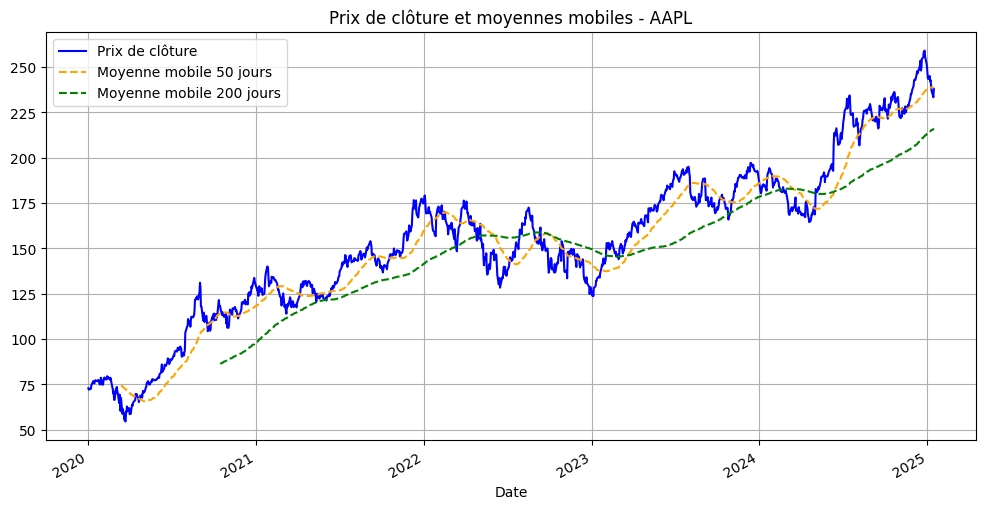

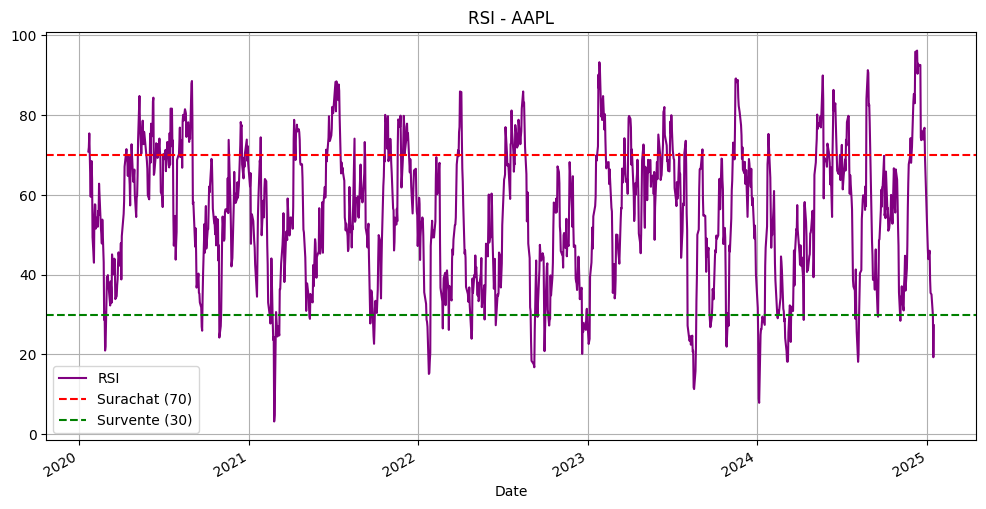

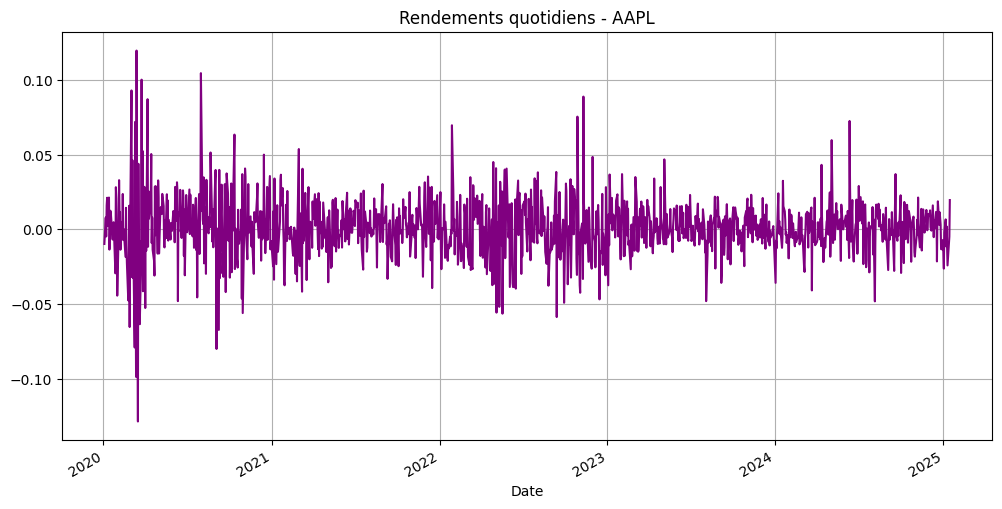


Analyse de l'action : MSFT
----------------------------------------
PER : 35.20314
Dividende annuel : 0.7799999999999999%
Rendement annuel moyen : 24.96%
Volatilité annuelle : 30.43%
Ratio de Sharpe : 0.82


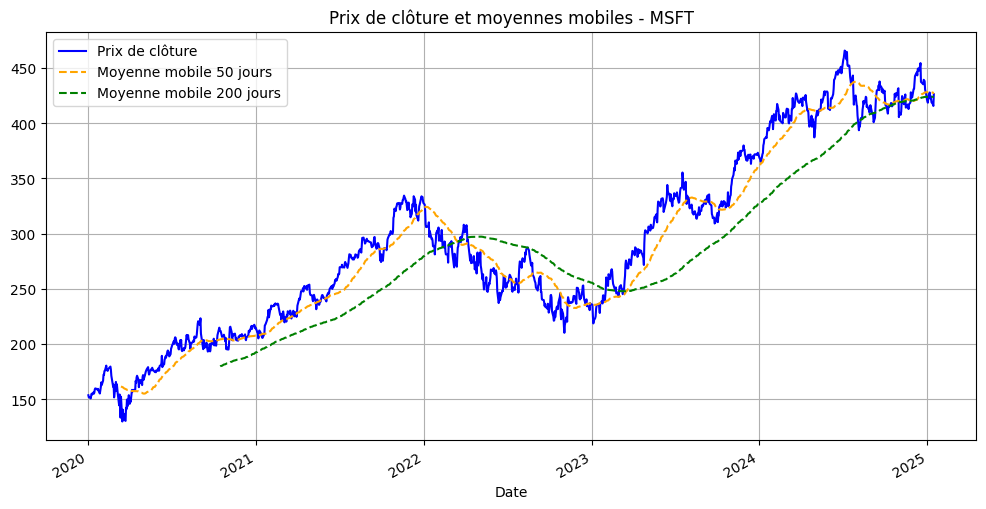

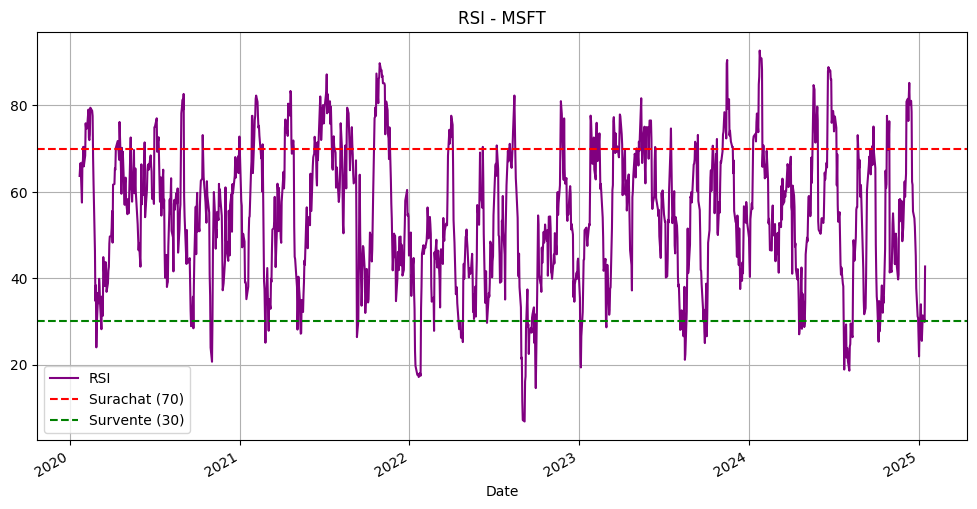

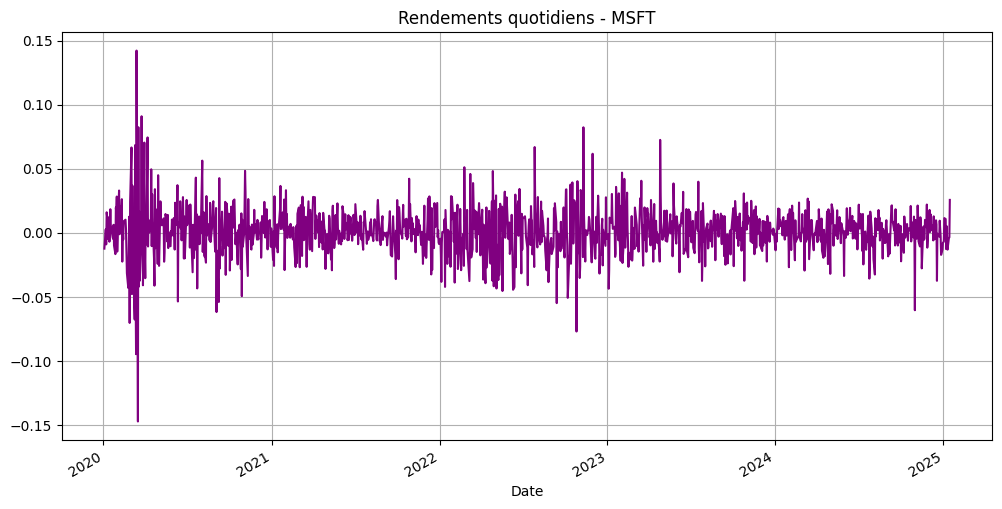


Analyse de l'action : GOOGL
----------------------------------------
PER : 25.900661
Dividende annuel : 0.41000000000000003%
Rendement annuel moyen : 26.24%
Volatilité annuelle : 32.45%
Ratio de Sharpe : 0.81


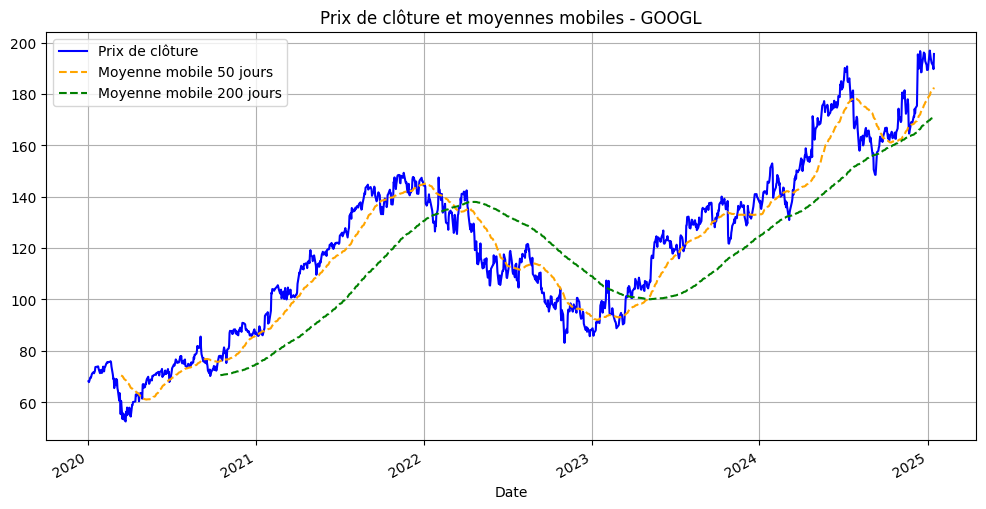

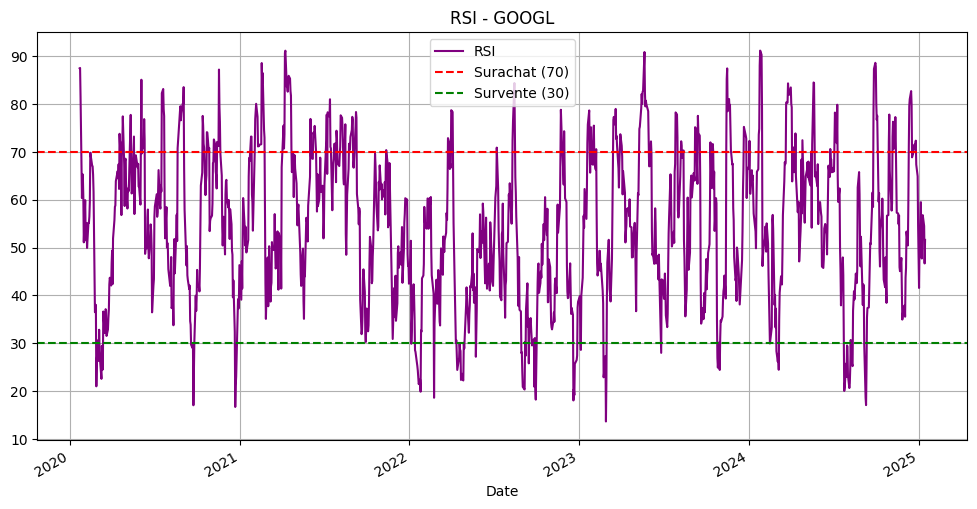

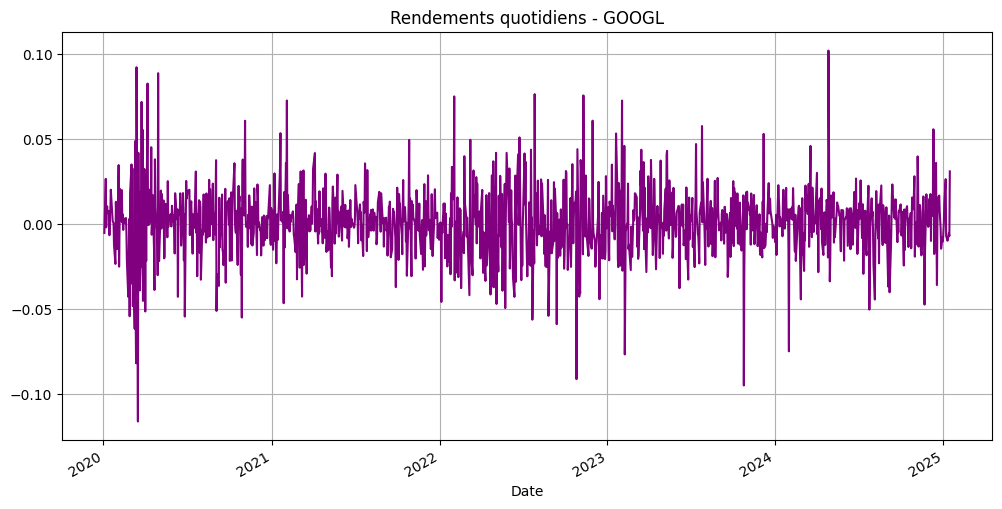


Résumé comparatif des actions :
  Ticker        PER  Dividend Yield (%)  Annual Return (%)  Volatility (%)  \
0   AAPL  39.059113                0.42          28.573764       31.631888   
1   MSFT  35.203140                0.78          24.955257       30.432020   
2  GOOGL  25.900661                0.41          26.244872       32.446022   

   Sharpe Ratio  
0      0.903321  
1      0.820033  
2      0.808878  

Conseils :
- Investissez en priorité dans AAPL :
  * Ratio de Sharpe élevé (0.90).
  * Rendement annuel attendu : 28.57%.
  * Volatilité : 31.63%.
  * Dividende : 0.42%.
- Vérifiez les tendances à court et long terme avant d'investir.
- Diversifiez vos investissements pour minimiser les risques.

Résumé enregistré dans 'comparaison_actions.csv'.


In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Fonction pour calculer le RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    """Calcule le RSI à partir des prix de clôture."""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def comparer_actions(tickers, start_date="2020-01-01"):
    """
    Compare plusieurs actions en affichant des métriques clés et des graphiques pour chaque ticker.
    Fournit des conseils sur laquelle investir en priorité.
    """
    print("Comparaison des actions :")
    print("=" * 40)
    aujourd_hui = datetime.today().strftime('%Y-%m-%d')
    
    summary = []
    for ticker in tickers:
        print(f"\nAnalyse de l'action : {ticker}")
        print("-" * 40)

        try:
            action = yf.Ticker(ticker)
            data = action.history(start=start_date, end=aujourd_hui)
        except Exception as e:
            print(f"Erreur lors du téléchargement des données pour {ticker} : {e}")
            continue

        if data.empty:
            print(f"Erreur : Les données téléchargées pour {ticker} sont vides.")
            continue

        # Calculs des indicateurs techniques
        data['Daily Return'] = data['Close'].pct_change()
        data['SMA_50'] = data['Close'].rolling(window=50).mean()
        data['SMA_200'] = data['Close'].rolling(window=200).mean()
        data['RSI'] = calculate_rsi(data['Close'])

        # Calcul des métriques financières
        annual_return = data['Daily Return'].mean() * 252
        annual_volatility = data['Daily Return'].std() * (252 ** 0.5)
        sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0

        # Informations fondamentales
        try:
            info = action.info
            per = info.get('trailingPE', 'N/A')
            dividend_yield = info.get('dividendYield', 'N/A')
        except Exception as e:
            per = 'N/A'
            dividend_yield = 'N/A'

        # Affichage des résultats
        print(f"PER : {per}")
        print(f"Dividende annuel : {dividend_yield * 100 if dividend_yield != 'N/A' else 'N/A'}%")
        print(f"Rendement annuel moyen : {annual_return:.2%}")
        print(f"Volatilité annuelle : {annual_volatility:.2%}")
        print(f"Ratio de Sharpe : {sharpe_ratio:.2f}")

        summary.append({
            'Ticker': ticker,
            'PER': per,
            'Dividend Yield (%)': dividend_yield * 100 if dividend_yield != 'N/A' else 'N/A',
            'Annual Return (%)': annual_return * 100,
            'Volatility (%)': annual_volatility * 100,
            'Sharpe Ratio': sharpe_ratio
        })

        afficher_graphiques(data, ticker)

    # Résumé comparatif
    summary_df = pd.DataFrame(summary)
    print("\nRésumé comparatif des actions :")
    print(summary_df)
    
    # Conseils basés sur les résultats
    if not summary_df.empty:
        meilleure_action = summary_df.loc[summary_df['Sharpe Ratio'].idxmax()]
        print("\nConseils :")
        print(f"- Investissez en priorité dans {meilleure_action['Ticker']} :")
        print(f"  * Ratio de Sharpe élevé ({meilleure_action['Sharpe Ratio']:.2f}).")
        print(f"  * Rendement annuel attendu : {meilleure_action['Annual Return (%)']:.2f}%.")
        print(f"  * Volatilité : {meilleure_action['Volatility (%)']:.2f}%.")

        if meilleure_action['Dividend Yield (%)'] != 'N/A':
            print(f"  * Dividende : {meilleure_action['Dividend Yield (%)']:.2f}%.")
        print("- Vérifiez les tendances à court et long terme avant d'investir.")
        print("- Diversifiez vos investissements pour minimiser les risques.")
    else:
        print("Aucune donnée valide n'a été trouvée pour fournir des conseils.")
    
    # Sauvegarde du résumé
    summary_df.to_csv("comparaison_actions.csv", index=False)
    print("\nRésumé enregistré dans 'comparaison_actions.csv'.")

def afficher_graphiques(data, ticker):
    """
    Affiche les graphiques pour les tendances et les indicateurs techniques.
    """
    plt.figure(figsize=(12, 6))
    data['Close'].plot(label='Prix de clôture', color='blue')
    data['SMA_50'].plot(label='Moyenne mobile 50 jours', linestyle='--', color='orange')
    data['SMA_200'].plot(label='Moyenne mobile 200 jours', linestyle='--', color='green')
    plt.title(f"Prix de clôture et moyennes mobiles - {ticker}")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    data['RSI'].plot(title=f"RSI - {ticker}", color='purple')
    plt.axhline(70, linestyle='--', color='red', label='Surachat (70)')
    plt.axhline(30, linestyle='--', color='green', label='Survente (30)')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    data['Daily Return'].plot(title=f"Rendements quotidiens - {ticker}", color='purple')
    plt.grid()
    plt.show()

# Exemple d'utilisation
tickers = input("Entrez les tickers des actions à comparer (séparés par des virgules, ex : AAPL,MSFT,GOOGL) : ").strip().upper().split(',')
comparer_actions(tickers)
